<a href="https://colab.research.google.com/github/csy99/dna-nn-theory/blob/master/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import calinski_harabasz_score, silhouette_score

In [3]:
!pip install PyDrive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [4]:
dir_path = '/content/gdrive/My Drive/Colab Notebooks/'
chip_path = 'CHIP/'
uci_path = 'UCI/'
viridae_path = 'viridae/'

In [ ]:
# CHIP toy reading data
def readFasta(file):
  with open(file, 'r') as f:
    records = np.array([record.seq._data.upper() for record in SeqIO.parse(f, 'fasta')])
  with open(file, 'r') as f:
    records_id = np.array([record.id for record in SeqIO.parse(f, 'fasta')])
  print('reading', str(file), 'Number of sequences :', 
        len(records), 'Length of sequences :', len(records[0]))
  records_df = pd.DataFrame({'id': records_id, 'seq': records})
  return records_df

# read fasta data
data_path = '/content/gdrive/My Drive/Colab Notebooks/CHIP/'
chip_train = readFasta(data_path + 'train.fasta')
chip_val = readFasta(data_path + 'valid.fasta')
chip_test = readFasta(data_path + 'test.fasta')
chip_train["id"] = chip_train["id"].astype(int)
chip_val["id"] = chip_val["id"].astype(int)
chip_test["id"] = chip_test["id"].astype(int)
print(chip_train.id.value_counts())
print(chip_val.id.value_counts())
print(chip_test.id.value_counts())

NameError: ignored

In [ ]:
# UCI reading data
data_path = '/content/gdrive/My Drive/Colab Notebooks/UCI/'
splice_df = pd.read_csv(data_path + 'splice.data', header=None)
splice_df.columns = ['Classes', 'Name', 'Seq']
splice_df["Seq"] = splice_df["Seq"].str.replace(' ', '').str.replace('N', 'A').str.replace('D', 'T').str.replace('S', 'C').str.replace('R', 'G')
splice_df["Label"] = splice_df.apply(lambda row: convert_label(row), axis=1)
print('The shape of the datasize is', splice_df.shape)
seq_len = len(splice_df.Seq[0])
uci_xtrain_full, uci_xtest, uci_ytrain_full, uci_ytest = train_test_split(splice_df, splice_df.Label, test_size=0.2, random_state=100, stratify=splice_df.Label)
uci_xtrain, uci_xval, uci_ytrain, uci_yval = train_test_split(uci_xtrain_full, uci_ytrain_full, test_size=0.2, random_state=100, stratify=uci_ytrain_full)
print("shape of training, validation, test set\n", uci_xtrain.shape, uci_xval.shape, uci_xtest.shape, uci_ytrain.shape, uci_yval.shape, uci_ytest.shape)

In [37]:
# viridae reading data
data_path = '/content/gdrive/My Drive/Colab Notebooks/viridae/'
records_df = pd.read_csv(data_path + 'clean.csv')
# replace all '-' with N (stands for any nt)
records_df.seq = records_df.seq.str.replace('-', 'N')
records_df.seq = records_df.seq.str.replace('R', 'N')
records_df.seq = records_df.seq.str.replace('Y', 'N')
seq_len = len(records_df.seq[0])
print("The length of the sequence is", seq_len)
viridae_xtrain_full, viridae_xtest, viridae_ytrain_full, viridae_ytest = train_test_split(records_df, records_df.label, test_size=0.2, random_state=100, stratify=records_df.label)
viridae_xtrain, viridae_xval, viridae_ytrain, viridae_yval = train_test_split(viridae_xtrain_full, viridae_ytrain_full, test_size=0.2, random_state=100, stratify=viridae_ytrain_full)
print("shape of training, validation, test set\n", viridae_xtrain.shape, viridae_xval.shape, viridae_xtest.shape, viridae_ytrain.shape, viridae_yval.shape, viridae_ytest.shape)

The length of the sequence is 4132
shape of training, validation, test set
 (179, 3) (45, 3) (57, 3) (179,) (45,) (57,)


In [5]:
def plotVec(ax, x, y, cmap=matplotlib.colors.ListedColormap(["red", "blue"]), title="title"):
  scatter = ax.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap)
  ax.set_title(title)
  ax.legend(*scatter.legend_elements(), loc=0, title="Classes")

  
def plot_acc_loss(history, loss_ylim=(0.2, 1.2), acc_ylim=(0.5, 1.0), title1='model loss', title2='model accuracy', figsize=(10, 5)):
  fig, axes = plt.subplots(1, 2, figsize=figsize)
  ax1 = axes[0]
  ax2 = axes[1]

  ax1.plot(history['loss'], label='training')
  ax1.plot(history['val_loss'], label='validation')
  ax1.set_ylim(loss_ylim)
  ax1.set_title(title1)
  ax1.set_xlabel('epoch')
  ax1.set_ylabel('loss')
  ax1.legend(['train', 'validation'], loc='upper left')
  
  ax2.plot(history['accuracy'], label='training')
  ax2.plot(history['val_accuracy'], label='validation')
  ax2.set_ylim(acc_ylim)
  ax2.set_title(title2)
  ax2.set_xlabel('epoch')
  ax2.set_ylabel('accuracy')
  ax2.legend(['train', 'validation'], loc='upper left')
  fig.tight_layout()

Baseline Models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

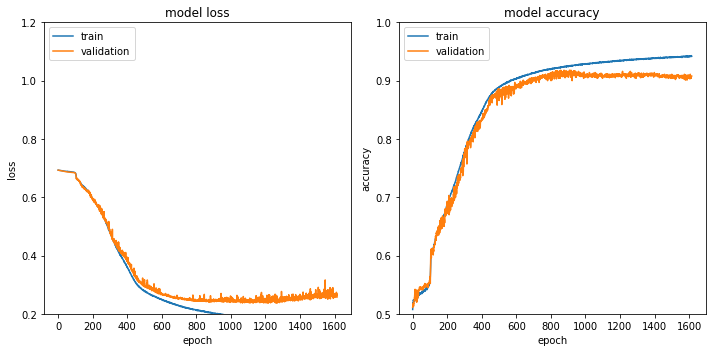

In [23]:
chip_sgd256_hist = pd.read_csv(dir_path+chip_path+'baseline_chip_sgd256_history.csv')
plot_acc_loss(chip_sgd256_hist)
plt.savefig("baseline chip sgd256 training.png")
files.download("baseline chip sgd256 training.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

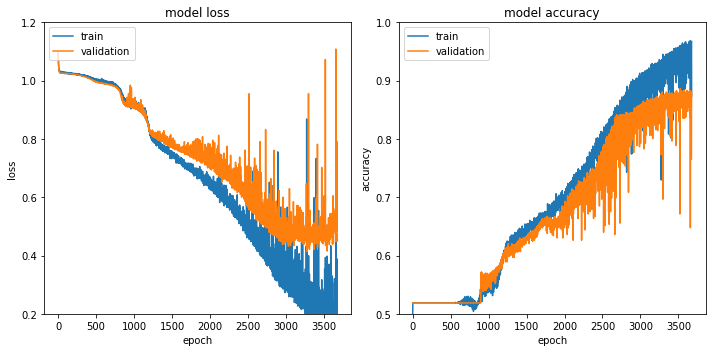

In [24]:
uci_sgd256_hist = pd.read_csv(dir_path+uci_path+'baseline_uci_sgd256_history.csv')
plot_acc_loss(uci_sgd256_hist)
plt.savefig("baseline uci sgd256 training.png")
files.download("baseline uci sgd256 training.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

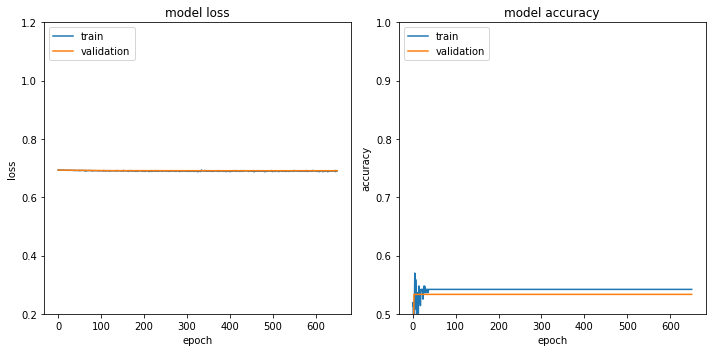

In [25]:
viridae_sgd256_hist = pd.read_csv(dir_path+viridae_path+'baseline_viridae_sgd256_history.csv')
plot_acc_loss(viridae_sgd256_hist)
plt.savefig("baseline viridae sgd256 training.png")
files.download("baseline viridae sgd256 training.png")

LSTM AE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

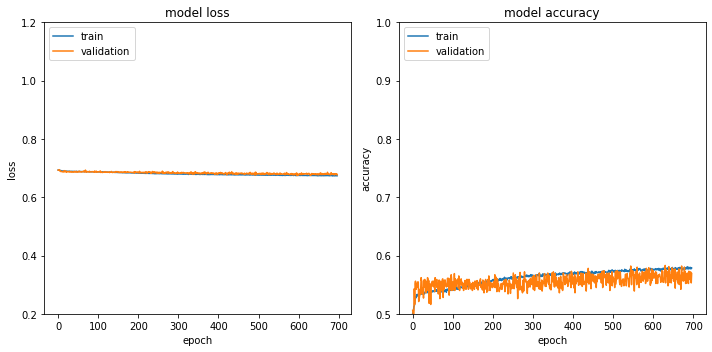

In [27]:
ae_chip_adam32_pred_hist = pd.read_csv(dir_path+chip_path+'ae_chip_adam32_prediction_history.csv')
plot_acc_loss(ae_chip_adam32_pred_hist)
fig_name = "ae chip adam32 prediction.png"
plt.savefig(fig_name)
files.download(fig_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

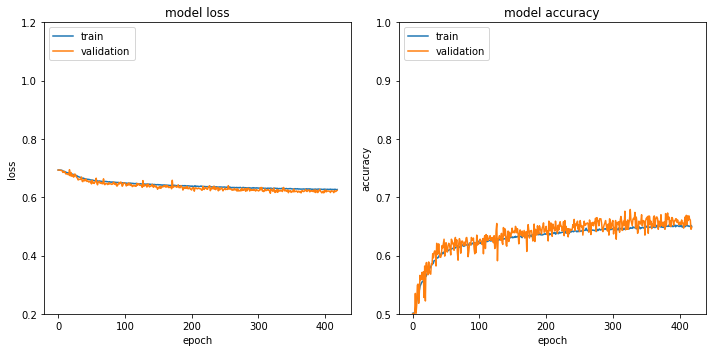

In [28]:
ae_chip_adam256_pred_hist = pd.read_csv(dir_path+chip_path+'ae_chip_adam256_prediction_history.csv')
plot_acc_loss(ae_chip_adam256_pred_hist)
fig_name = "ae chip adam256 prediction.png"
plt.savefig(fig_name)
files.download(fig_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

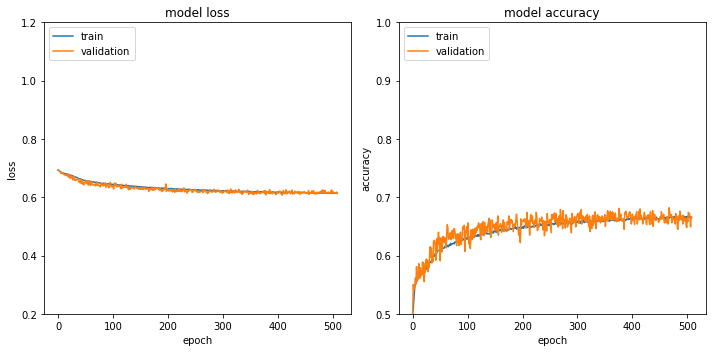

In [29]:
ae_chip_adam1024_pred_hist = pd.read_csv(dir_path+chip_path+'ae_chip_adam1024_prediction_history.csv')
plot_acc_loss(ae_chip_adam1024_pred_hist)
fig_name = "ae chip adam1024 prediction.png"
plt.savefig(fig_name)
files.download(fig_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

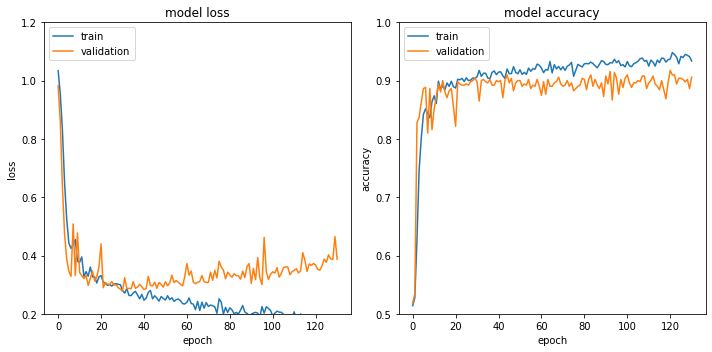

In [30]:
ae_uci_pred_hist = pd.read_csv(dir_path+uci_path+'ae_uci_prediction_history.csv')
plot_acc_loss(ae_uci_pred_hist)
fig_name = "ae uci prediction.png"
plt.savefig(fig_name)
files.download(fig_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

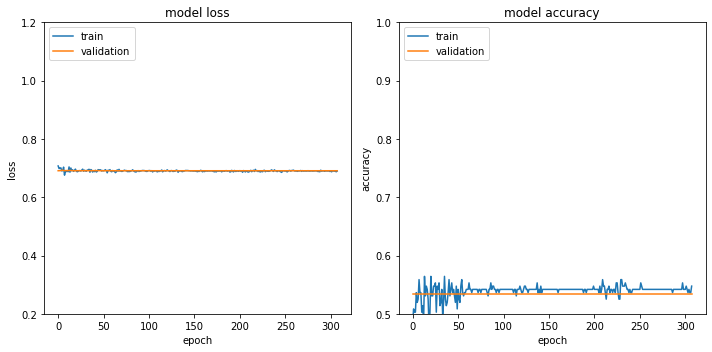

In [31]:
ae_viridae_pred_hist = pd.read_csv(dir_path+viridae_path+'ae_viridae_prediction_history.csv')
plot_acc_loss(ae_viridae_pred_hist)
fig_name = "ae viridae prediction.png"
plt.savefig(fig_name)
files.download(fig_name)

Doc2Vec

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

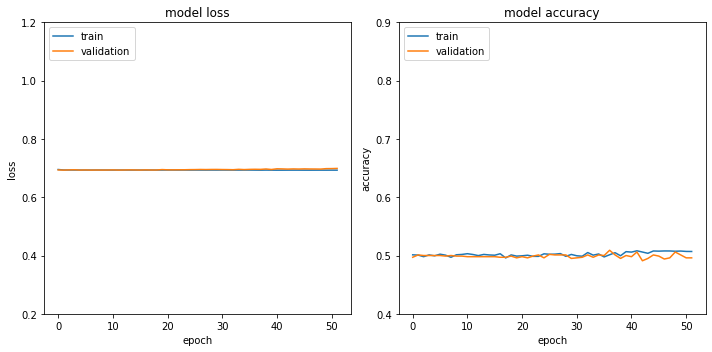

In [40]:
doc2vec_chip_pred_hist = pd.read_csv(dir_path+chip_path+'doc2vec_chip_size30_history.csv')
plot_acc_loss(doc2vec_chip_pred_hist, acc_ylim=(0.4,0.9))

fig_name = "doc2vec chip prediction.png"
plt.savefig(fig_name)
files.download(fig_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

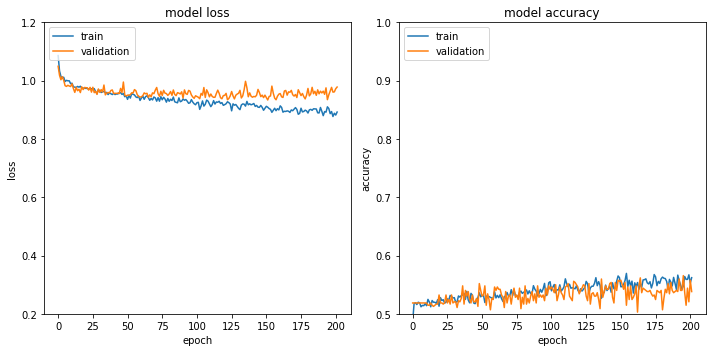

In [33]:
doc2vec_uci_pred_hist = pd.read_csv(dir_path+uci_path+'doc2vec_uci_size30_history.csv')
plot_acc_loss(doc2vec_uci_pred_hist)
fig_name = "doc2vec uci prediction.png"
plt.savefig(fig_name)
files.download(fig_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

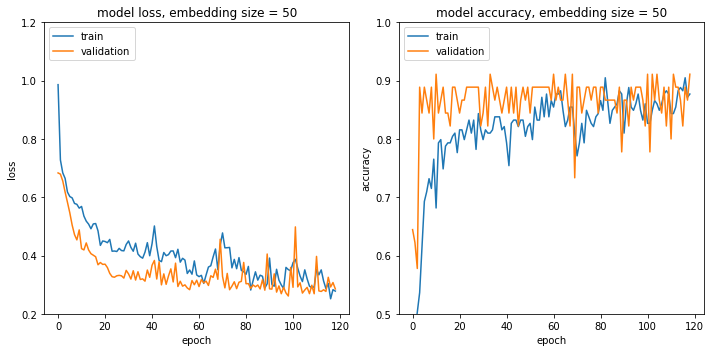

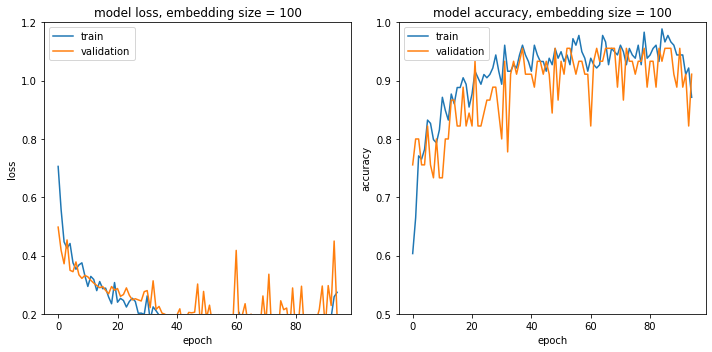

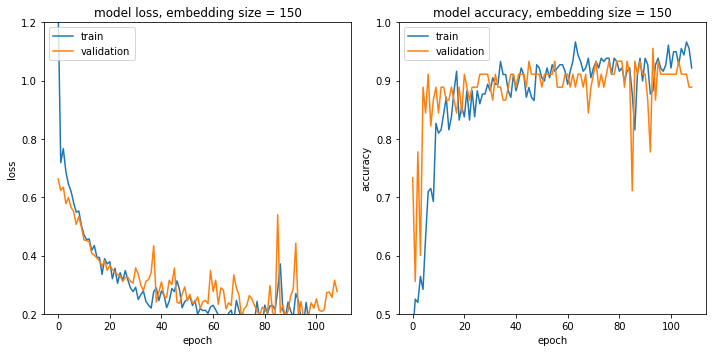

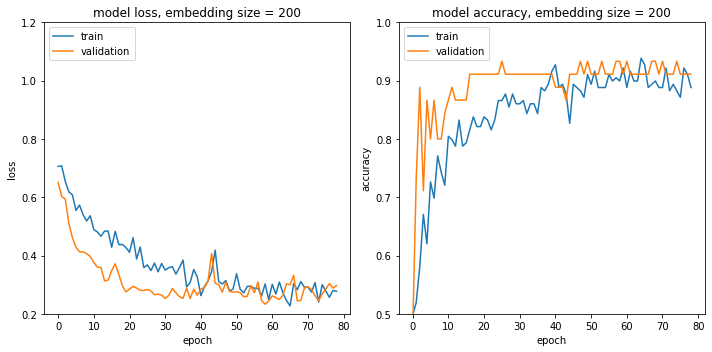

In [36]:
embed_size_list = [50,100,150,200]
for i in range(4):
  s = embed_size_list[i]
  filename = "doc2vec_viridae_size" + str(s) + "_history.csv"
  doc2vec_viridae_pred_hist = pd.read_csv(dir_path+viridae_path+filename)
  title1 = "model loss, embedding size = " + str(s)
  title2 = "model accuracy, embedding size = " + str(s)
  plot_acc_loss(doc2vec_viridae_pred_hist, title1=title1, title2=title2)
  fig_name = "doc2vec viridae size" + str(s) + " prediction.png"
  plt.savefig(fig_name)
  files.download(fig_name)


TSNE for viridae

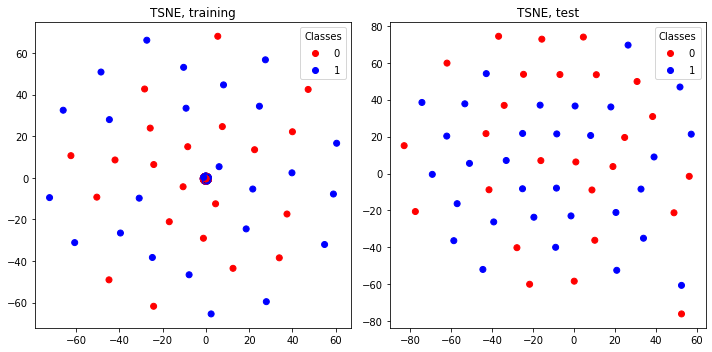

In [ ]:
ae_viridae_raw_train = np.array(pd.read_csv(dir_path+viridae_path+'ae_viridae_raw_train.csv', header=None))
ae_viridae_raw_val = np.array(pd.read_csv(dir_path+viridae_path+'ae_viridae_raw_val.csv', header=None))
ae_viridae_raw_test = np.array(pd.read_csv(dir_path+viridae_path+'ae_viridae_raw_test.csv', header=None))
ae_viridae_tsne_train = np.array(pd.read_csv(dir_path+viridae_path+'ae_viridae_tsne_train.csv', header=None))
ae_viridae_tsne_val = np.array(pd.read_csv(dir_path+viridae_path+'ae_viridae_tsne_val.csv', header=None))
ae_viridae_tsne_test = np.array(pd.read_csv(dir_path+viridae_path+'ae_viridae_tsne_test.csv', header=None))

viridae_x_big_train_tsne = np.vstack((ae_viridae_tsne_train, ae_viridae_tsne_val))
viridae_y_big_train = pd.concat((viridae_ytrain, viridae_yval))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plotVec(axes[0], viridae_x_big_train_tsne, viridae_y_big_train, title="TSNE, training")
plotVec(axes[1], ae_viridae_tsne_test, viridae_ytest, title="TSNE, test")
fig.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

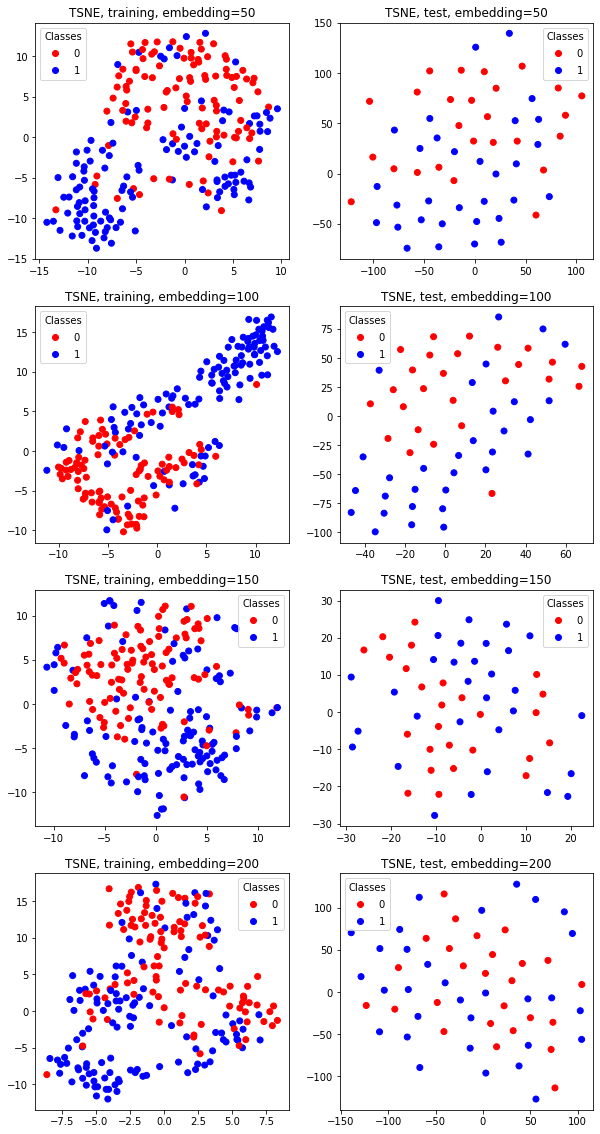

In [38]:
embed_size_list = [50,100,150,200]
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
for i in range(4):
  s = embed_size_list[i]
  filename = "doc2vec_viridae_tsne_size" + str(s)
  doc2vec_viridae_tsne_train = np.array(pd.read_csv(dir_path+viridae_path+filename+"_train.csv",header=None))
  doc2vec_viridae_tsne_test = np.array(pd.read_csv(dir_path+viridae_path+filename+"_test.csv",header=None))
  plotVec(axes[i, 0], doc2vec_viridae_tsne_train, viridae_ytrain_full, title="TSNE, training, embedding="+str(s))
  plotVec(axes[i, 1], doc2vec_viridae_tsne_test, viridae_ytest, title="TSNE, test, embedding="+str(s))

fig_name = "doc2vec viridae tsne.png"
plt.savefig(fig_name)
files.download(fig_name)

Appendix

In [ ]:
# The three following plots are comparing the batch size. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

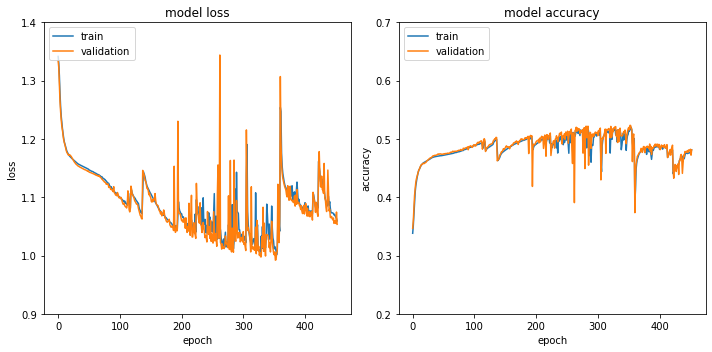

In [16]:
ae_chip_adam32_reconstruction_hist = pd.read_csv(dir_path+chip_path+'ae_chip_adam32_reconstruction_history.csv')
plot_acc_loss(ae_chip_adam32_reconstruction_hist, loss_ylim=(0.9, 1.4), acc_ylim=(0.2, 0.7))
plt.savefig("e32.png")
files.download("e32.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

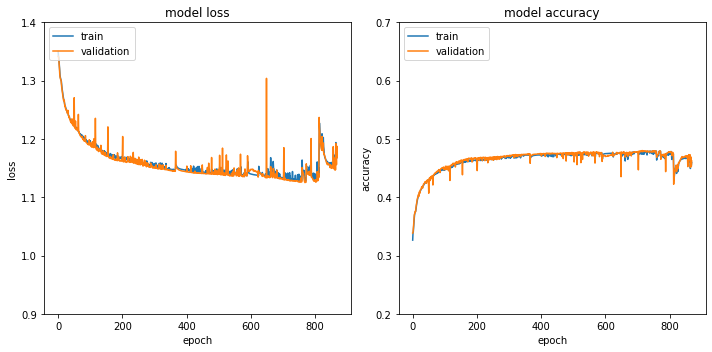

In [17]:
ae_chip_adam256_reconstruction_hist = pd.read_csv(dir_path+chip_path+'ae_chip_adam256_reconstruction_history.csv')
plot_acc_loss(ae_chip_adam256_reconstruction_hist, loss_ylim=(0.9, 1.4), acc_ylim=(0.2, 0.7))
plt.savefig("e256.png")
files.download("e256.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

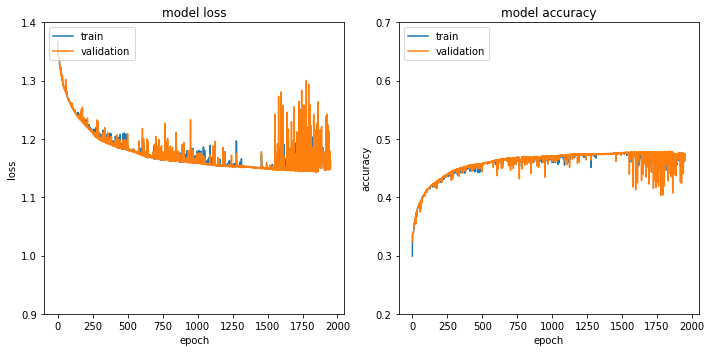

In [18]:
ae_chip_adam1024_reconstruction_hist = pd.read_csv(dir_path+chip_path+'ae_chip_adam1024_reconstruction_history.csv')
plot_acc_loss(ae_chip_adam1024_reconstruction_hist, loss_ylim=(0.9, 1.4), acc_ylim=(0.2, 0.7))
plt.savefig("e1024.png")
files.download("e1024.png") 

In [ ]:
# The following plots are comparing the optimizers. 

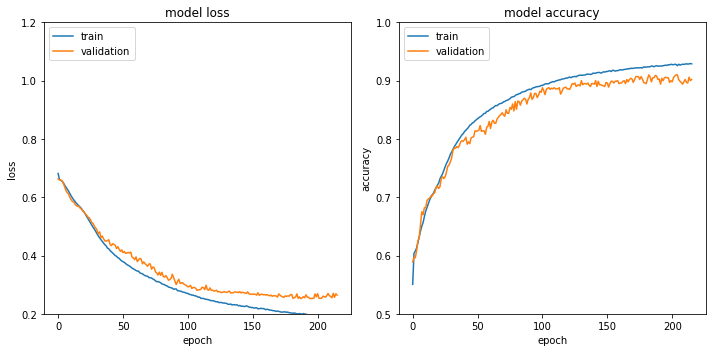

In [ ]:
baseline_chip_adam256_hist = pd.read_csv(dir_path+chip_path+'baseline_chip_adam256_history.csv')
plot_acc_loss(baseline_chip_adam256_hist)
plt.savefig("baseline chip adam256 training.png")
files.download("baseline chip adam256 training.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

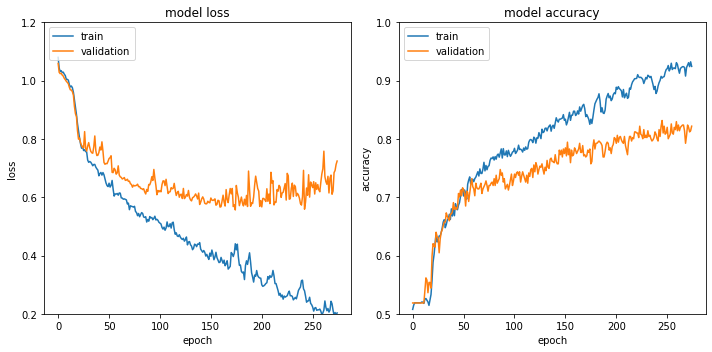

In [19]:
baseline_uci_adam256_hist = pd.read_csv(dir_path+uci_path+'baseline_uci_adam256_history.csv')
plot_acc_loss(baseline_uci_adam256_hist)
plt.savefig("baseline uci adam256 training.png")
files.download("baseline uci adam256 training.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

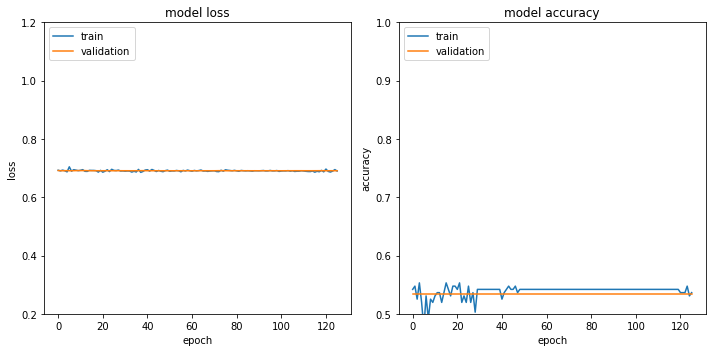

In [20]:
baseline_viridae_adam256_hist = pd.read_csv(dir_path+viridae_path+'baseline_viridae_adam256_history.csv')
plot_acc_loss(baseline_viridae_adam256_hist)
plt.savefig("baseline viridae adam256 training.png")
files.download("baseline viridae adam256 training.png")

In [ ]:
# Compare different version of viridae

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

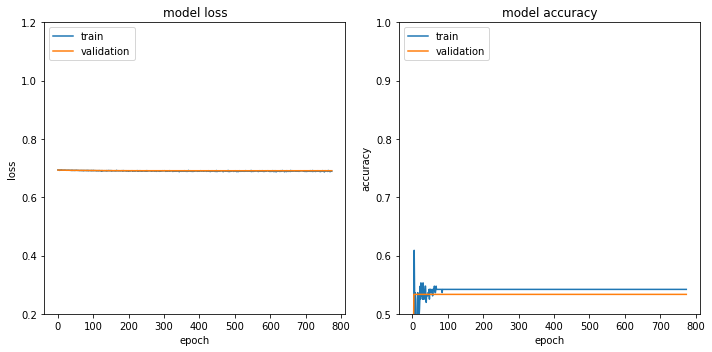

In [21]:
viridae_rear_sgd256_hist = pd.read_csv(dir_path+viridae_path+'baseline_viridae(rear)_sgd256_history.csv')
plot_acc_loss(viridae_rear_sgd256_hist)
plt.savefig("baseline viridae_rear adam256 training.png")
files.download("baseline viridae_rear adam256 training.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

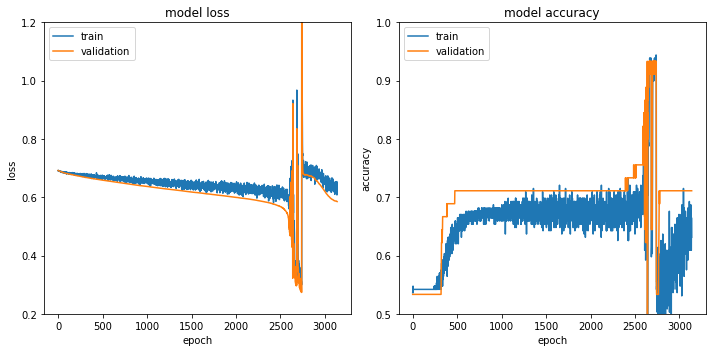

In [22]:
viridae_front_sgd256_hist = pd.read_csv(dir_path+viridae_path+'baseline_viridae(front)_sgd256_history.csv')
plot_acc_loss(viridae_front_sgd256_hist)
plt.savefig("baseline viridae_front adam256 training.png")
files.download("baseline viridae_front adam256 training.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

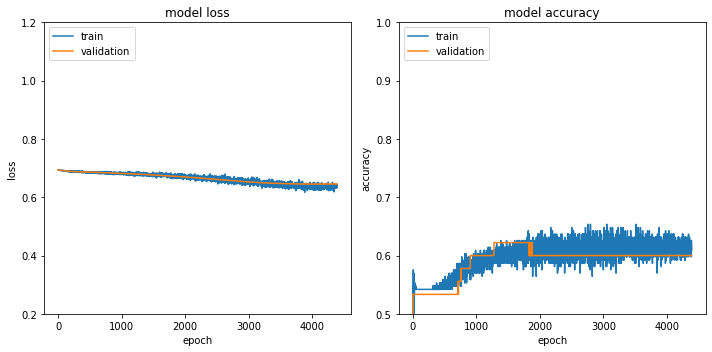

In [34]:
viridae_mdl_sgd256_hist = pd.read_csv(dir_path+viridae_path+'baseline_viridae(mdl)_sgd256_history.csv')
plot_acc_loss(viridae_mdl_sgd256_hist)
plt.savefig("baseline viridae_mdl adam256 training.png")
files.download("baseline viridae_mdl adam256 training.png")